<p style="font-size:30px; text-align:center; padding:50px 70px;font-weight:bolder;background-color:gold;border-radius:20px">Gold Rates Prediction using Machine Learning


>  Historically gold coinage was widely used as currency; when paper money was introduced, it typically was a receipt redeemable for gold coin or bullion. In a monetary system known as the gold standard, a certain weight of gold was given the name of a unit of currency. For a long period, the United States government set the value of the US dollar so that one troy ounce was equal to 20.67 (0.665 per gram), but in 1934 the dollar was devalued to 35.00 per troy ounce (0.889/g). By 1961, it was becoming hard to maintain this price, and a pool of US and European banks agreed to manipulate the market to prevent further currency devaluation against increased gold demand.

> On 17 March 1968, economic circumstances[clarification needed] caused the collapse of the gold pool, and a two-tiered pricing scheme was established whereby gold was still used to settle international accounts at the old 35.00 per troy ounce (1.13/g) but the price of gold on the private market was allowed to fluctuate; this two-tiered pricing system was abandoned in 1975 when the price of gold was left to find its free-market level.[citation needed] Central banks still hold historical gold reserves as a store of value although the level has generally been declining.[citation needed] The largest gold depository in the world is that of the U.S. Federal Reserve Bank in New York, which holds about 3% of the gold known to exist and accounted for today, as does the similarly laden U.S. Bullion Depository at Fort Knox. In 2005 the World Gold Council estimated total global gold supply to be 3,859 tonnes and demand to be 3,754 tonnes, giving a surplus of 105 tonnes.

> After 15 August 1971 Nixon shock, the price began to greatly increase, and between 1968 and 2000 the price of gold ranged widely, from a high of 850 per troy ounce (27.33/g) on 21 January 1980, to a low of 252.90 per troy ounce (8.13/g) on 21 June 1999 (London Gold Fixing). Prices increased rapidly from 2001, but the 1980 high was not exceeded until 3 January 2008, when a new maximum of 865.35 per troy ounce was set. Another record price was set on 17 March 2008, at 1023.50 per troy ounce (32.91/g).

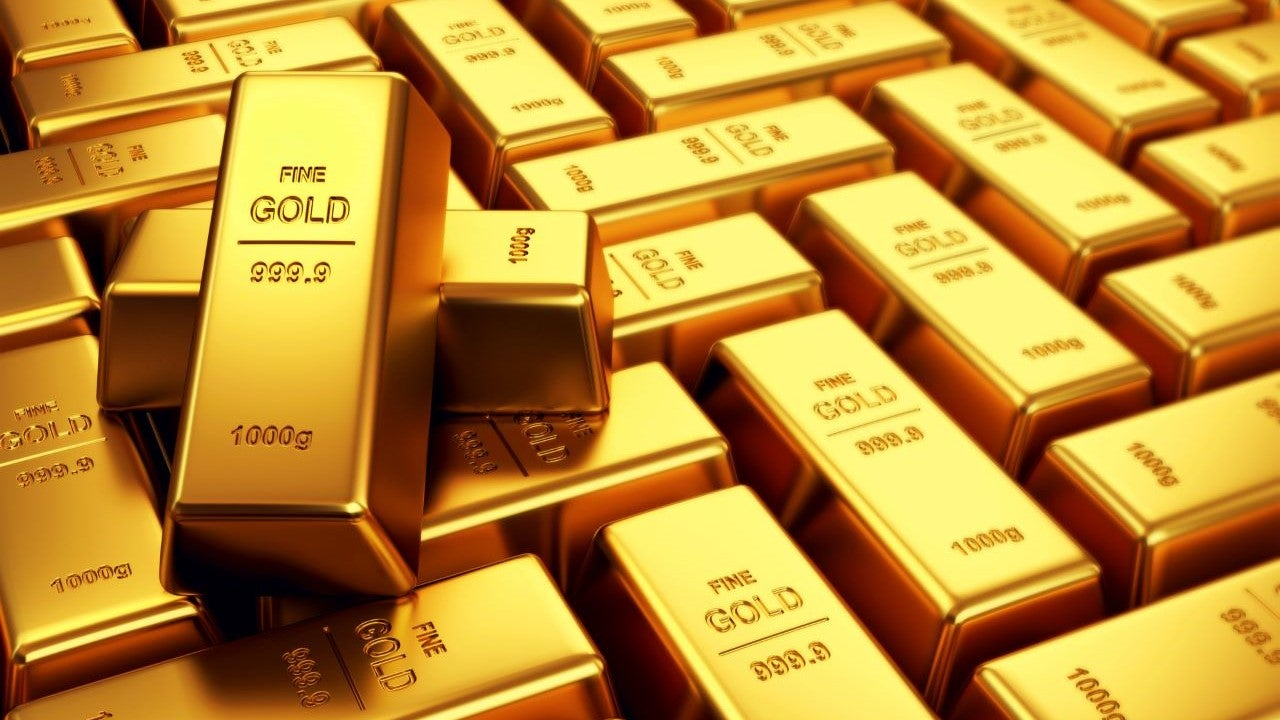

<p style="font-size:30px; text-align:center; padding:20px 70px;font-weight:bolder;background-color:gold;border-radius:10px">About The Data


> Data for this study is collected from November 18th 2011 to January 1st 2019 from various sources. The data has 1718 rows in total and 80 columns in total. Data for attributes, such as Oil Price, Standard and Poor’s (S&P) 500 index, Dow Jones Index US Bond rates (10 years), Euro USD exchange rates, prices of precious metals Silver and Platinum and other metals such as Palladium and Rhodium, prices of US Dollar Index, Eldorado Gold Corporation and Gold Miners ETF were gathered.

> The dataset has 1718 rows in total and 80 columns in total. Data for attributes, such as Oil Price, Standard and Poor’s (S&P) 500 index, Dow Jones Index US Bond rates (10 years), Euro USD exchange rates, prices of precious metals Silver and Platinum and other metals such as Palladium and Rhodium, prices of US Dollar Index, Eldorado Gold Corporation and Gold Miners ETF were gathered.

# Attributes:

#### Features

- Gold ETF :- Date, Open, High, Low, Close and Volume.
- S&P 500 Index :- 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume'
- Dow Jones Index :- 'DJ_open','DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume'
- Eldorado Gold Corporation (EGO) :- 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume'
- EURO - USD Exchange Rate :- 'EU_Price','EU_open', 'EU_high', 'EU_low', 'EU_Trend'
- Brent Crude Oil Futures :- 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend'
- Crude Oil WTI USD :- 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend'
- Silver Futures :- 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend'
- US Bond Rate (10 years) :- 'USB_Price', 'USB_Open', 'USB_High','USB_Low', 'USB_Trend'
- Platinum Price :- 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low','PLT_Trend'
- Palladium Price :- 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low','PLD_Trend'
- Rhodium Prices :- 'RHO_PRICE'
- US Dollar Index : 'USDI_Price', 'USDI_Open', 'USDI_High','USDI_Low', 'USDI_Volume', 'USDI_Trend'
- Gold Miners ETF :- 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume'
- Oil ETF USO :- 'USO_Open','USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume'

<b><font size="5" color='Blue'>Import The Main Libraries</font></b>

In [15]:
# Most important
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# other
import missingno as msno
import os

 <b><font size="5" color='Blue'>Load The DataSet</font></b>


In [16]:
## Read the Csv file
data = pd.read_csv("FINAL_USO.csv")

In [17]:
df =data.copy()

<b><font size="5" color='Blue'>Inspect The Data</font></b>


In [18]:
# Show the head of the dataFrame 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [19]:
df = df.drop("Date",axis=1)

In [14]:
df.shape

(1718, 80)

# Conclusion
> So, we have 1718 records in the dataset and 80 columns including Adjusted Close which is our target variable.

In [30]:
## check nulls of data 
df.isnull().sum().sum()

0

 <b><font color='red' size=6>Split data</font></b>

In [32]:
# split the data to x and y
# y is 1 column contain the values is the target
# x contain the values of the rest of columns
x = df.drop(["Volume"],axis=1).values
y= df['Volume'].values

<b><font color='red' size=6>train test split</font></b>

In [33]:
# import the train_test_split
from sklearn.model_selection import train_test_split

In [34]:
# split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

<b><font size="10" color='Blue'>Data scaling using robust regression</font></b>


In [35]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

<center><b><font size="8" color='Blue'>Linear regression model</font></b></center>


In [36]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [37]:
reg.score(x_train,y_train)

0.7205482077019023

In [38]:
reg.score(x_test,y_test)

0.46057705571224883

In [39]:
reg.intercept_

4957351.239146037

In [40]:
reg.coef_

array([ 1.76093091e+06,  4.68812701e+07, -2.82035384e+07, -9.83825753e+06,
       -9.83825753e+06, -7.76275899e+06,  6.57687148e+06,  1.76788471e+07,
       -4.68991814e+07,  2.75250546e+07,  1.04949187e+06,  1.87088675e+07,
       -2.77795731e+07, -8.73479023e+06,  1.15674786e+07,  1.15674786e+07,
        7.34696152e+05,  1.15718636e+07, -5.62893900e+06, -2.37537843e+07,
       -6.10497839e+07,  7.70477181e+07,  5.16279208e+04,  2.51328054e+07,
        2.75124952e+06, -9.08244659e+06, -1.75199697e+07,  1.57757723e+05,
       -4.04189478e+06, -7.33808605e+06,  2.99933278e+06,  1.33031669e+07,
       -1.86645542e+05, -4.36662586e+05, -1.74930341e+07,  1.49621483e+07,
        2.88513131e+07, -3.48130159e+07,  3.19511017e+05,  2.87603273e+06,
        1.32881695e+07,  4.25105366e+06, -1.98352128e+07,  7.78163161e+05,
        3.30492634e+05, -1.67314164e+06, -6.97565461e+05,  3.07112307e+06,
       -2.26424150e+06,  3.64444617e+04, -9.92831930e+06,  1.62912341e+07,
        1.40385453e+07, -

In [42]:
pd.DataFrame(reg.coef_,df.columns[:-1],columns=['coeficients'])

,coeficients
Open,1.760931e+06
High,4.688127e+07
Low,-2.820354e+07
Close,-9.838258e+06
Adj Close,-9.838258e+06
...,...
USO_Open,-7.118812e+07
USO_High,3.642236e+07
USO_Low,2.133724e+07
USO_Close,2.133724e+07


In [44]:
y_pred_1 = reg.predict(x_test)

In [45]:
df_1 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_1})

In [46]:
df_1.head()

,y_test,Y_pred
0,8145900,3.028793e+06
1,4443400,2.017348e+06
2,11462100,1.245876e+07
3,3654200,6.351389e+06
4,20346500,1.465697e+07


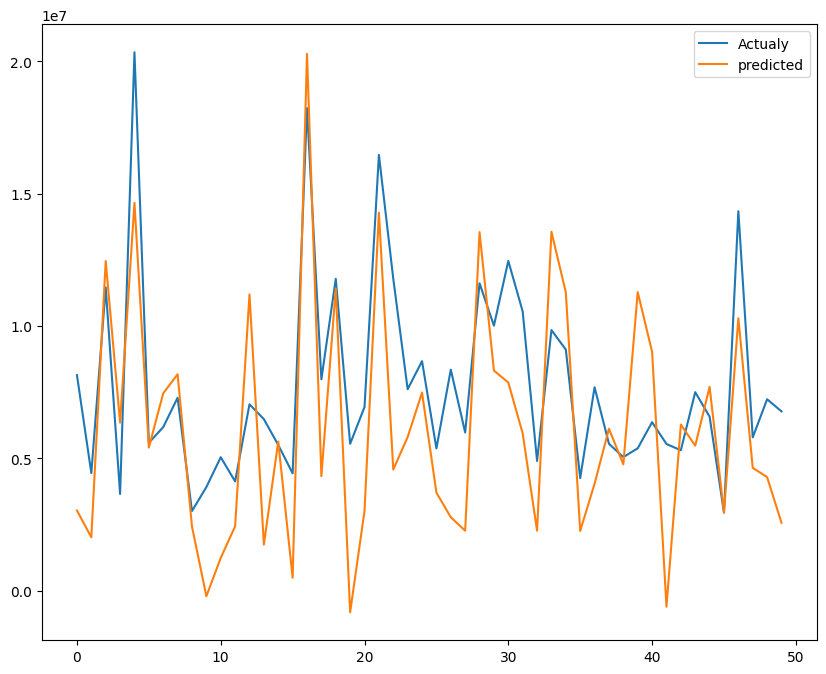

In [47]:
plt.figure(figsize=(10,8))
plt.plot(df_1[:50])
plt.legend(["Actualy","predicted"]);

<center><b><font size="25" color='Blue'>Ridge Model</font></b></center>


In [48]:
from sklearn import linear_model
rid = linear_model.Ridge(alpha=0.9)
rid.fit(x_train,y_train)

Ridge(alpha=0.9)

In [49]:
rid.score(x_train,y_train)

0.6674122556272635

In [50]:
rid.score(x_test,y_test)

0.5851863838072188

In [51]:
rid.intercept_

6843903.974604996

In [52]:
rid.coef_

array([ 4.19247933e+06,  1.97026288e+07, -1.66140428e+07, -3.87647703e+06,
       -3.87647703e+06, -9.89699743e+05, -1.05635468e+06, -7.27013368e+05,
       -1.04045254e+06,  1.65465756e+06,  9.99993665e+05,  1.99008058e+06,
       -3.26246634e+05,  6.48177614e+05,  1.99573422e+05,  1.99573422e+05,
        5.05202214e+05, -4.71066792e+05, -1.14130130e+06, -3.18153078e+06,
       -6.74912924e+04,  1.85588218e+06,  1.15252765e+05,  1.39356485e+06,
        2.43933283e+06,  1.41469628e+06, -1.33678712e+06,  4.28247735e+05,
        1.41883877e+05,  1.59373351e+06,  1.49800726e+06, -8.31528415e+05,
       -1.35556470e+05, -3.88211448e+05, -7.70300376e+05,  2.16023483e+06,
        1.85532224e+06, -1.83992250e+06,  4.35725244e+04, -2.38232279e+06,
        7.64781877e+06,  8.14877156e+06, -1.23825320e+07,  1.17889471e+06,
        2.00071190e+05, -1.23983665e+06,  3.12726594e+05,  1.57369145e+06,
       -2.91919227e+06,  4.84137311e+03, -1.72597245e+06,  3.41670324e+06,
        4.56959642e+06, -

In [54]:
pd.DataFrame(rid.coef_,df.columns[:-1],columns=['coeficients'])

,coeficients
Open,4.192479e+06
High,1.970263e+07
Low,-1.661404e+07
Close,-3.876477e+06
Adj Close,-3.876477e+06
...,...
USO_Open,-7.630336e+05
USO_High,-7.402383e+04
USO_Low,1.496208e+05
USO_Close,1.496208e+05


In [55]:
y_pred_2 = rid.predict(x_test)

In [56]:
df_2 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_2})

In [57]:
df_2.head()

,y_test,Y_pred
0,8145900,4.638330e+06
1,4443400,3.905527e+06
2,11462100,1.388137e+07
3,3654200,5.931456e+06
4,20346500,1.388102e+07


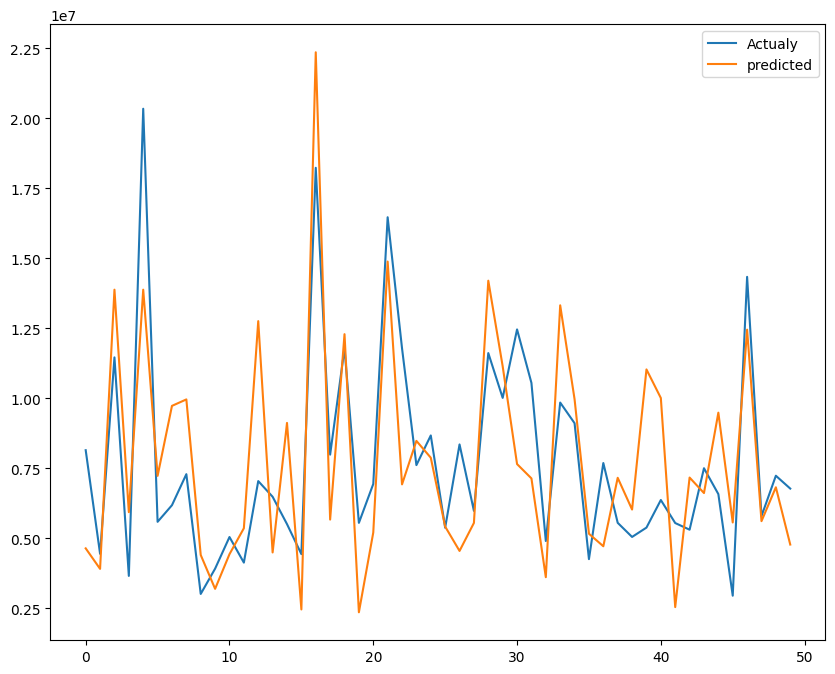

In [58]:
plt.figure(figsize=(10,8))
plt.plot(df_2[:50])
plt.legend(["Actualy","predicted"]);

<center><b><font size="25" color='Blue'>Lasso Model</font></b></center>

In [59]:
from sklearn import linear_model
lass = linear_model.Lasso(alpha=0.9)
lass.fit(x_train,y_train)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.246e+15, tolerance: 3.085e+12
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.9)

In [60]:
lass.score(x_train,y_train)

0.6598812895924147

In [61]:
lass.score(x_test,y_test)

0.5634996589796549

In [62]:
lass.intercept_

6718776.203910086

In [63]:
lass.coef_

array([ 7.82834540e+06,  6.18359105e+06, -1.91936961e+07,  4.32220984e+06,
        3.07547188e-08, -4.38008893e+06,  1.76834547e+05, -4.69660052e+05,
       -4.09781780e+05,  3.63388447e+06,  9.19049159e+05,  3.73372924e+06,
       -1.76010640e+06,  4.19676743e+05, -3.83554117e+05, -1.30135054e-09,
        5.82223939e+05, -2.62494349e+06, -1.25065863e+06, -3.08847732e+06,
        1.95195573e+06,  1.82887619e+06,  1.16601483e+05,  7.40227392e+06,
        3.29384526e+06, -1.41282580e+06, -4.99370315e+06,  3.63580351e+05,
        5.72753304e+06,  4.09299930e+06,  1.17445557e+06, -7.04031789e+06,
       -1.63763203e+05, -3.84695608e+05,  9.99444224e+05,  9.26082625e+06,
        8.95530933e+05, -1.03221985e+07,  1.00967179e+05,  5.78208945e+06,
        1.68016812e+07,  2.67514704e+06, -2.42630234e+07,  1.08786062e+06,
        3.21193667e+05, -3.41082886e+05,  2.24838565e+06,  2.86008206e+06,
       -7.07400152e+06,  1.33041242e+05,  5.40985564e+06,  1.48048943e+07,
        5.56087561e+06, -

In [65]:
pd.DataFrame(lass.coef_,df.columns[:-1],columns=['coeficients'])

,coeficients
Open,7.828345e+06
High,6.183591e+06
Low,-1.919370e+07
Close,4.322210e+06
Adj Close,3.075472e-08
...,...
USO_Open,-2.246946e+06
USO_High,9.701670e+05
USO_Low,-8.700754e+05
USO_Close,-1.061859e-10


In [66]:
y_pred_3 = lass.predict(x_test)

In [67]:
df_3 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_3})

In [68]:
df_3.head()

,y_test,Y_pred
0,8145900,4.313155e+06
1,4443400,3.929553e+06
2,11462100,1.367161e+07
3,3654200,5.403067e+06
4,20346500,1.265361e+07


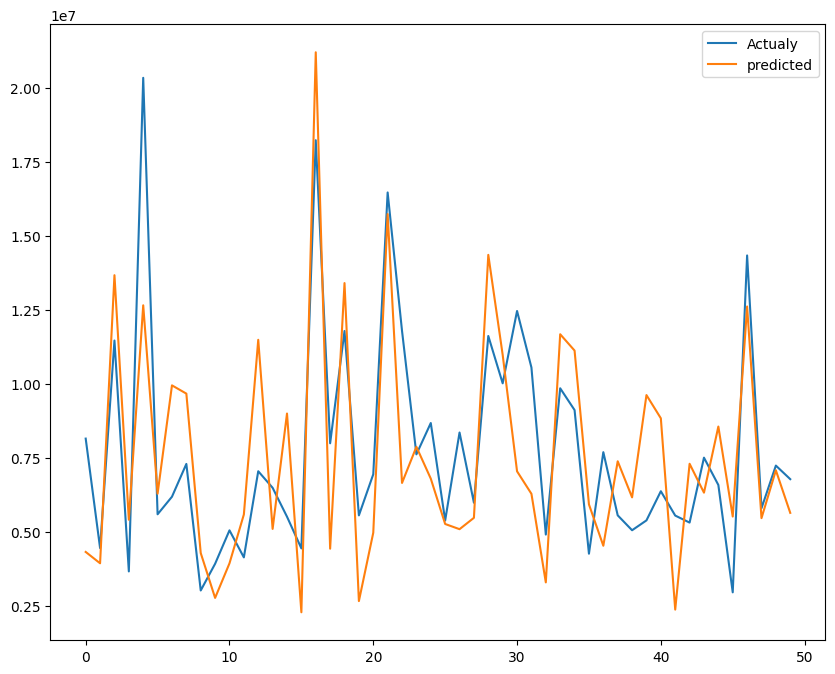

In [69]:
plt.figure(figsize=(10,8))
plt.plot(df_3[:50])
plt.legend(["Actualy","predicted"]);

<center><b><font size="25" color='Blue'>Evaluating models</font></b></center>


<b><font size="5" color='red'>Linear reg evaluation</font></b>


In [70]:
#import r2_score 
from sklearn.metrics import r2_score

In [71]:
# calculate r2_score for the model
reg_score = r2_score(y_test,y_pred_1)

In [72]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-reg_score)*(n-1)/(n-p-1)
adj_r2

0.4253002240907816

In [73]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < reg_score

True

In [74]:
# import mean_absolute_error and mean_absolute_percentage_error and mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [75]:
# calculate mean_squared_error
mse = mean_squared_error(y_test , y_pred_1)
mse

13406389186628.033

In [78]:
# calculate mean_absolute_error
mae = mean_absolute_error(y_test , y_pred_1)
mae

2747747.3078099806

In [79]:
# calculate mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test , y_pred_1)
mape

0.34440465585736796

In [80]:
# calculate root_mean_squared_error
reg_mse = mean_squared_error(y_test , y_pred_1)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

3661473.6359324004


<b><font size="5" color='red'>Ridge Evaluation</font></b>


In [81]:
# calculate r2_score for the model
rid_score = r2_score(y_test,y_pred_2)
rid_score

0.5851863838072188

In [82]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-rid_score)*(n-1)/(n-p-1)
adj_r2

0.5580586721522273

In [83]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < rid_score

True

In [84]:
# calculate mean_squared_error
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_mse

10309447971175.688

In [85]:
# calculate mean_absolute_error
rid_mae = mean_absolute_error(y_test , y_pred_2)
rid_mae

2290293.935973401

In [86]:
# calculate mean_absolute_percentage_error
rid_mape = mean_absolute_percentage_error(y_test , y_pred_2)
rid_mape

0.27965450139119513

In [87]:
# calculate root_mean_squared_error
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_rmse = np.sqrt(reg_mse)
rid_rmse

3661473.6359324004


<b><font size="5" color='red'>Lasso Evaluation</font></b>


In [88]:
# calculate r2_score for the model
lass_score = r2_score(y_test,y_pred_3)

In [89]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-lass_score)*(n-1)/(n-p-1)
adj_r2

0.5349536929692185

In [90]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < lass_score

True

In [91]:
# calculate mean_squared_error
lass_mse = mean_squared_error(y_test , y_pred_3)
lass_mse

10848432595950.076

In [92]:
# calculate mean_absolute_error
lass_mae = mean_absolute_error(y_test , y_pred_3)
lass_mae

2291899.965877843

In [93]:
# calculate mean_absolute_percentage_error
lass_mape = mean_absolute_percentage_error(y_test , y_pred_3)
lass_mape

0.2706592337362496

In [94]:
# calculate root_mean_squared_error
lass_mse = mean_squared_error(y_test , y_pred_3)
lass_rmse = np.sqrt(reg_mse)
lass_rmse

3661473.6359324004

<b><font size="20" color='Blue'>Comapring The Three Models</font></b>


In [95]:
models = ["Linear","Ridge","Lasso"]
data = [[reg_score,reg_mse],[rid_score,rid_mse],[lass_score,lass_mse]]
cols = ['r2_score','RMSE']
pd.DataFrame(data = data , columns=cols , index = models).sort_values(ascending=False , by=["r2_score"])

,r2_score,RMSE
Ridge,0.585186,1.030945e+13
Lasso,0.563500,1.084843e+13
Linear,0.460577,1.340639e+13
